In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests,json
import csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
covid_data=pd.read_csv('owid-covid-data_final.csv')

In [0]:
covid_data.location.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

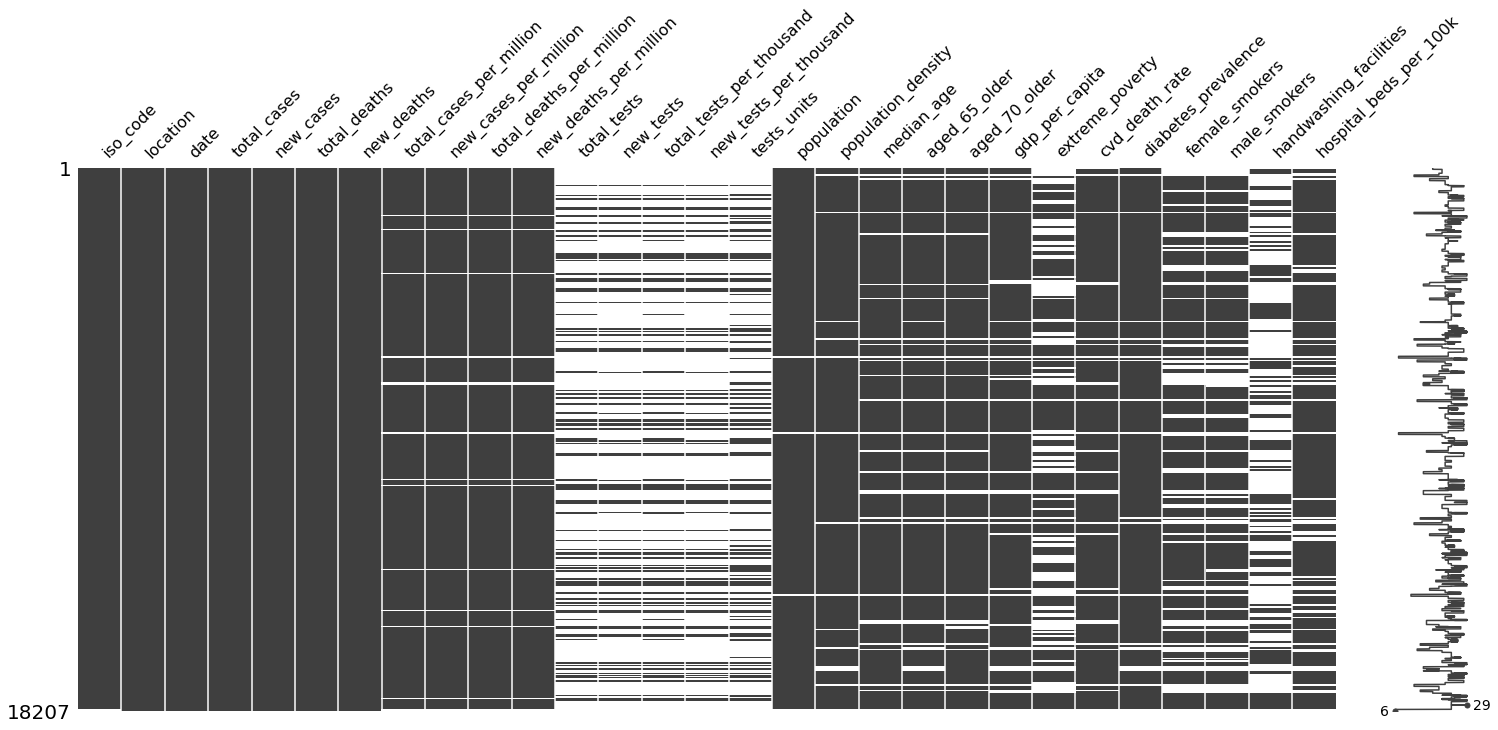

In [0]:
import missingno as msno
msno.matrix(covid_data)

In [0]:
covid_data.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [0]:
continent_data=pd.read_csv('countryContinent.csv',encoding='ISO-8859-1')

In [0]:
continent_data[continent_data.iso_code=='USA']

,iso_code,continent
235,USA,Americas


In [0]:
continent_data.rename(columns = {'code_3':'iso_code'}, inplace = True) 
continent_data = continent_data.filter(['iso_code','continent'])
continent_data

,iso_code,continent
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania
...,...,...
244,WLF,Oceania
245,ESH,Africa
246,YEM,Asia
247,ZMB,Africa


In [0]:
pop_data=pd.read_csv("world_population.tsv",sep='\t')

In [0]:
pop_data=pop_data[['id','name','population']]
pop_data

,id,name,population
0,CHN,China,1330141295
1,IND,India,1173108018
2,USA,United States,310232863
3,IDN,Indonesia,242968342
4,BRA,Brazil,201103330
...,...,...,...
237,ATA,Antarctica,0
238,ATF,French Southern and Antarctic Lands,0
239,SDS,South Sudan,12152321
240,ABV,Somaliland,3500000


In [0]:
pop_den_data=pd.read_csv('map_data.csv')
pop_den_data=pop_den_data[['iso_code','population','population_density']]

In [0]:
pop_den_data[pop_den_data['iso_code']=='ABW']

,iso_code,population,population_density
153,ABW,106766,584.8


In [0]:
covid_data = pd.merge(covid_data,continent_data,  how = "left", on = "iso_code")
# covid_data = pd.merge(covid_data,pop_den_data,  how = "left", on = "iso_code")



In [0]:
covid_data.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_100k', 'continent'],
      dtype='object')

In [0]:
covid_data=covid_data.drop(columns=['total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units','aged_65_older', 'aged_70_older','extreme_poverty','diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_100k'])

In [0]:
covid_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,population_density,median_age,gdp_per_capita,cvd_death_rate,continent
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,106766.0,584.8,41.2,35973.781,NaN,Americas
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,106766.0,584.8,41.2,35973.781,NaN,Americas
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,106766.0,584.8,41.2,35973.781,NaN,Americas
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,106766.0,584.8,41.2,35973.781,NaN,Americas
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,106766.0,584.8,41.2,35973.781,NaN,Americas


In [0]:
covid_data.shape

(18207, 17)

In [0]:
covid_data.date.max()

'2020-05-18'

In [0]:
covid_data.to_csv('timeseries_data_new.csv')

In [0]:
df_temp = covid_data.groupby(['location','continent','iso_code','population','population_density','median_age','gdp_per_capita'])['new_cases_per_million',
      'new_deaths_per_million',
       'new_cases', 'new_deaths'].sum().reset_index()
# df_temp["date"] = pd.to_datetime(df_temp["date"]).dt.strftime('%m/%d/%Y')
df_temp.columns=['location','continent','iso_code','population','population_density','median_age','gdp_per_capita','total_cases_per_million',
        'total_deaths_per_million',
        'Confirmed','Deaths']
df_temp['Confirmed'].fillna(0, inplace=True)
inclWorld=df_temp.sort_values('Confirmed', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df_temp[df_temp['location']=='India']

,location,continent,iso_code,population,population_density,median_age,gdp_per_capita,total_cases_per_million,total_deaths_per_million,Confirmed,Deaths
74,India,Asia,IND,1.380004e+09,450.419,28.2,6426.674,65.891,2.081,90927,2872


In [0]:
df_temp['Confirmed']=df_temp['Confirmed'].replace(0,1)
df_temp['Deaths']=df_temp['Deaths'].replace(0,1)

In [0]:
df_temp['Confirmed_log']=np.log(df_temp['Confirmed'])
df_temp['Deaths_log']=np.log(df_temp['Deaths'])

In [0]:
df_temp.isin([np.inf,-np.inf]).sum()

location                    0
continent                   0
iso_code                    0
population                  0
population_density          0
median_age                  0
gdp_per_capita              0
total_cases_per_million     0
total_deaths_per_million    0
Confirmed                   0
Deaths                      0
Confirmed_log               0
Deaths_log                  0
dtype: int64

In [0]:
df_temp.to_csv('final_final.csv')


In [0]:
df_temp

,location,continent,iso_code,population,population_density,median_age,gdp_per_capita,total_cases_per_million,total_deaths_per_million,Confirmed,Deaths,Confirmed_log,Deaths_log
0,Afghanistan,Asia,AFG,38928341.0,54.422,18.6,1803.987,164.457,4.315,6402,168,8.764366,5.123964
1,Albania,Europe,ALB,2877800.0,104.871,38.0,11803.431,324.202,10.764,933,31,6.838405,3.433987
2,Algeria,Africa,DZA,43851043.0,17.348,29.1,13913.839,155.553,12.362,6821,542,8.827761,6.295266
3,Angola,Africa,AGO,32866268.0,23.890,16.8,5819.495,1.458,0.061,48,2,3.871201,0.693147
4,Antigua and Barbuda,Americas,ATG,97928.0,231.845,32.1,21490.943,255.290,30.635,25,3,3.218876,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela,Americas,VEN,28435943.0,36.253,29.0,16745.022,17.727,0.350,504,10,6.222576,2.302585
171,Vietnam,Asia,VNM,97338583.0,308.127,32.6,6171.884,3.265,0.000,318,1,5.762051,0.000000
172,Yemen,Asia,YEM,29825968.0,53.508,20.3,1479.147,4.161,0.640,124,19,4.820282,2.944439
173,Zambia,Africa,ZMB,18383956.0,22.995,17.7,3689.251,36.937,0.379,679,7,6.520621,1.945910


In [0]:
top5=pd.read_csv('top5_per_continent.csv')

In [0]:
top5

,location,iso_code,population,population_density,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,Confirmed,Deaths,continent
0,South Africa,ZAF,59308690,46.754,214.791,12.207,4.013,0.320,12739,238,Africa
1,Egypt,EGY,102334403,97.999,105.820,4.837,5.580,0.293,10829,571,Africa
2,Morocco,MAR,36910558,80.080,179.000,7.613,5.148,0.406,6607,190,Africa
3,Algeria,DZA,43851043,17.348,146.906,4.538,12.064,0.958,6442,529,Africa
4,Ghana,GHA,31072945,126.719,177.968,29.640,0.772,0.161,5530,24,Africa
5,United States,USA,331002647,35.608,4283.618,146.612,259.533,14.888,1417889,85906,Americas
6,Brazil,BRA,212559409,25.040,954.641,65.600,65.831,4.145,202918,13993,Americas
7,Peru,PER,32971846,25.129,2444.631,130.354,68.756,3.397,80604,2267,Americas
8,Canada,CAN,37742157,4.037,1944.801,73.128,144.984,5.485,73401,5472,Americas
9,Mexico,MEX,128932753,66.444,330.366,18.684,34.724,2.738,42595,4477,Americas


In [0]:
top_13_country=df_temp.sort_values('Confirmed',ascending=False)[:13]
# top_idx=top_13_country.tolist()
# df_temp.ix[top_idx]
# top_13_country.drop_index(162,126)
top_13_country.drop(top_13_country.loc[top_13_country['location'] =='Peru'].index, inplace=True)
top_13_country.drop(top_13_country.loc[top_13_country['location'] =='Turkey'].index, inplace=True)
top_13_country.drop(top_13_country.loc[top_13_country['location'] =='Iran'].index, inplace=True)

top_13_country.to_csv('top_10_cropped.csv')

In [0]:
top_13_country.sort_values('Deaths',ascending=False)

,location,continent,iso_code,population,population_density,median_age,gdp_per_capita,total_cases_per_million,total_deaths_per_million,Confirmed,Deaths,Confirmed_log,Deaths_log
167,United States,Americas,USA,3.310026e+08,35.608,38.3,54225.446,4434.660,268.133,1467884,88754,14.199332,11.393624
166,United Kingdom,Europe,GBR,6.788600e+07,272.898,40.8,39753.244,3537.707,507.703,240161,34466,12.389065,10.447729
80,Italy,Europe,ITA,6.046183e+07,205.859,47.9,35220.084,3717.390,525.341,224760,31763,12.322788,10.366057
57,France,Europe,FRA,6.527351e+07,122.578,42.0,38605.671,2179.916,423.222,142291,27625,11.865630,10.226476
148,Spain,Europe,ESP,4.675478e+07,93.105,45.5,34272.360,4934.211,589.525,230698,27563,12.348865,10.224230
23,Brazil,Americas,BRA,2.125594e+08,25.040,33.5,14103.452,1096.834,73.549,233142,15633,12.359403,9.657139
61,Germany,Europe,DEU,8.378394e+07,237.016,46.6,45229.245,2081.009,94.457,174355,7914,12.068849,8.976389
35,China,Asia,CHN,1.439324e+09,147.674,38.7,15308.712,58.388,3.220,84044,4638,11.339096,8.442039
74,India,Asia,IND,1.380004e+09,450.419,28.2,6426.674,65.891,2.081,90927,2872,11.417812,7.962764
133,Russia,Europe,RUS,1.459345e+08,8.823,39.6,24765.954,1864.144,17.384,272043,2537,12.513715,7.838738


In [0]:
def top_n(n): 
   top_n=pd.DataFrame()
   top_n=df_temp.groupby(['continent']).apply(lambda x: x.nlargest(n,['Confirmed'])).reset_index(drop=True)
   return top_n

In [0]:
top_5_df=top_n(5)
top_5_df

,location,continent,iso_code,population,population_density,median_age,gdp_per_capita,total_cases_per_million,total_deaths_per_million,Confirmed,Deaths,Confirmed_log,Deaths_log
0,South Africa,Africa,ZAF,5.930869e+07,46.754,27.3,12294.876,242.036,4.404,14355,261,9.571854,5.564520
1,Egypt,Africa,EGY,1.023344e+08,97.999,25.3,10550.206,114.515,5.981,11719,612,9.368967,6.416732
2,Algeria,Africa,DZA,4.385104e+07,17.348,29.1,13913.839,155.553,12.362,6821,542,8.827761,6.295266
3,Morocco,Africa,MAR,3.691056e+07,80.080,29.6,7485.013,182.631,5.194,6741,192,8.815964,5.257495
4,Ghana,Africa,GHA,3.107294e+07,126.719,21.1,4227.630,184.568,0.931,5735,29,8.654343,3.367296
5,United States,Americas,USA,3.310026e+08,35.608,38.3,54225.446,4434.660,268.133,1467884,88754,14.199332,11.393624
6,Brazil,Americas,BRA,2.125594e+08,25.040,33.5,14103.452,1096.834,73.549,233142,15633,12.359403,9.657139
7,Peru,Americas,PER,3.297185e+07,25.129,29.1,12236.706,2685.354,76.525,88541,2523,11.391221,7.833204
8,Canada,Americas,CAN,3.774216e+07,4.037,41.4,44017.591,2009.760,150.462,75853,5679,11.236553,8.644530
9,Mexico,Americas,MEX,1.289328e+08,66.444,29.3,17336.469,365.651,39.127,47144,5045,10.760962,8.526153


In [0]:
top_3_df=top_n(3)
top_3_df

,location,continent,iso_code,population,population_density,median_age,gdp_per_capita,total_cases_per_million,total_deaths_per_million,Confirmed,Deaths,Confirmed_log,Deaths_log
0,South Africa,Africa,ZAF,5.930869e+07,46.754,27.3,12294.876,242.036,4.404,14355,261,9.571854,5.564520
1,Egypt,Africa,EGY,1.023344e+08,97.999,25.3,10550.206,114.515,5.981,11719,612,9.368967,6.416732
2,Algeria,Africa,DZA,4.385104e+07,17.348,29.1,13913.839,155.553,12.362,6821,542,8.827761,6.295266
3,United States,Americas,USA,3.310026e+08,35.608,38.3,54225.446,4434.660,268.133,1467884,88754,14.199332,11.393624
4,Brazil,Americas,BRA,2.125594e+08,25.040,33.5,14103.452,1096.834,73.549,233142,15633,12.359403,9.657139
5,Peru,Americas,PER,3.297185e+07,25.129,29.1,12236.706,2685.354,76.525,88541,2523,11.391221,7.833204
6,Turkey,Asia,TUR,8.433907e+07,104.914,31.6,25129.341,1755.621,48.568,148067,4096,11.905420,8.317766
7,Iran,Asia,IRN,8.399295e+07,49.831,32.4,19082.620,1409.551,82.590,118392,6937,11.681756,8.844625
8,India,Asia,IND,1.380004e+09,450.419,28.2,6426.674,65.891,2.081,90927,2872,11.417812,7.962764
9,Russia,Europe,RUS,1.459345e+08,8.823,39.6,24765.954,1864.144,17.384,272043,2537,12.513715,7.838738


In [0]:
top_3_df.to_csv('top3_per_continent.csv')

In [0]:
top_5_df.to_csv('top5_per_continent.csv')

In [0]:
covid_data['']

In [0]:
covid_1 = pd.read_csv("covid_1.csv")
covid_2 = pd.read_csv("covid_2.csv")
covid_3 = pd.read_csv("covid_3.csv")
covid_4 = pd.read_csv("covid_4.csv")
covid_5 = pd.read_csv("covid_5.csv")

In [0]:
new_cov1=covid_1.groupby(['location']).apply(lambda x: x.nlargest(1,['total_cases'])).reset_index(drop=True)
new_cov2=covid_2.groupby(['location']).apply(lambda x: x.nlargest(1,['total_cases'])).reset_index(drop=True)
new_cov3=covid_3.groupby(['location']).apply(lambda x: x.nlargest(1,['total_cases'])).reset_index(drop=True)
new_cov4=covid_4.groupby(['location']).apply(lambda x: x.nlargest(1,['total_cases'])).reset_index(drop=True)
new_cov5=covid_5.groupby(['location']).apply(lambda x: x.nlargest(1,['total_cases'])).reset_index(drop=True)


In [0]:
new_cov5.rename(columns = {'date.1':'day'}, inplace = True) 


In [0]:
new_cov5

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,population_density,median_age,gdp_per_capita,cvd_death_rate,continent,day,month,year
0,AFG,Afghanistan,18/05/20,6664,262,169,1,171.186,6.730,4.341,0.026,38928341.0,54.422,18.6,1803.987,597.029,Asia,18,5,2020
1,ALB,Albania,18/05/20,946,13,31,0,328.723,4.517,10.772,0.000,2877800.0,104.871,38.0,11803.431,304.195,Europe,18,5,2020
2,DZA,Algeria,18/05/20,7019,198,548,6,160.065,4.515,12.497,0.137,43851043.0,17.348,29.1,13913.839,278.364,Africa,18,5,2020
3,AND,Andorra,15/05/20,761,1,49,0,9849.220,12.942,634.181,0.000,77265.0,163.755,NaN,NaN,109.135,Europe,15,5,2020
4,AGO,Angola,15/05/20,48,3,2,0,1.460,0.091,0.061,0.000,32866268.0,23.890,16.8,5819.495,276.045,Africa,15,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,VNM,Vietnam,18/05/20,320,2,0,0,3.287,0.021,0.000,0.000,97338583.0,308.127,32.6,6171.884,245.465,Asia,18,5,2020
206,ESH,Western Sahara,01/05/20,6,0,0,0,10.045,0.000,0.000,0.000,597330.0,NaN,28.4,NaN,NaN,Africa,1,5,2020
207,YEM,Yemen,18/05/20,128,4,20,1,4.292,0.134,0.671,0.034,29825968.0,53.508,20.3,1479.147,495.003,Asia,18,5,2020
208,ZMB,Zambia,18/05/20,753,74,7,0,40.960,4.025,0.381,0.000,18383956.0,22.995,17.7,3689.251,234.499,Africa,18,5,2020


In [0]:
new_cov5.to_csv("covid_5.csv")